## Task 2 - Let’s read the CSV file with some more analytical and statistical analysis like head(), describe() etc

### Importing Necesary dependencies

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')
from scipy import stats
import warnings,os
import re



from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from subprocess import check_output
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('combined_data.csv')
df.head()

,author,date,Comment,like_count,reply_count,comment_length
0,@maryamadirie8722,2024-04-19T09:43:45Z,Cadaab ka rabi bilaash uma san mujrimiin Rabiy...,0,0,61
1,@hagiohaji7937,2024-04-19T03:35:24Z,"Beenaale gacan ku dhiigle tuug, hala dilo.",0,0,42
2,@fadumawarsamemumin4232,2024-04-18T12:17:27Z,All Shaba a le lagu Haye Polis dada cun ah Qam...,0,0,96
3,@user-we3ty2ct8f,2024-04-17T22:02:09Z,Hadu I yaqaano ha ii abtiriyo kulahaa kk ma ho...,0,0,125
4,@abdiali4991,2024-04-17T08:07:17Z,Sarkaal kan bistoolda loo dibtay waa ina asaga...,0,0,117


In [3]:
df.describe()

,like_count,reply_count,comment_length
count,2527.000000,2527.000000,2527.000000
mean,2.000000,0.237831,96.521567
std,9.466614,1.211593,112.602332
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,36.000000
50%,0.000000,0.000000,68.000000
75%,1.000000,0.000000,118.500000
max,171.000000,27.000000,1775.000000


In [4]:
len(df)

2527

## Task 3 - Let’s clean the data by removing the extra data and outliers, dropping or filling the missing values, etc. Create the final dataframe for further analysis

### Cheking For duplicate values

In [5]:
df.duplicated().sum()

1

### Droping Duplicate Values

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

### Check for missing values

In [8]:
df.isna().sum()

author            0
date              0
Comment           0
like_count        0
reply_count       0
comment_length    0
dtype: int64

In [9]:
# Remove rows with missing values
df_cleaned = df.dropna()

In [10]:
df=df_cleaned

## Task 4: Lets analyze and visualize the distribution of post length and word counts?

#### Calculate word count

In [11]:
word_count = df['word_count'] = df['Comment'].apply(lambda x: len(x.split()))

In [12]:
word_count

0       10
1        7
2       18
3       22
4       19
        ..
2522     3
2523     3
2524    17
2525     4
2526    12
Name: Comment, Length: 2526, dtype: int64

In [13]:
df.head()

,author,date,Comment,like_count,reply_count,comment_length,word_count
0,@maryamadirie8722,2024-04-19T09:43:45Z,Cadaab ka rabi bilaash uma san mujrimiin Rabiy...,0,0,61,10
1,@hagiohaji7937,2024-04-19T03:35:24Z,"Beenaale gacan ku dhiigle tuug, hala dilo.",0,0,42,7
2,@fadumawarsamemumin4232,2024-04-18T12:17:27Z,All Shaba a le lagu Haye Polis dada cun ah Qam...,0,0,96,18
3,@user-we3ty2ct8f,2024-04-17T22:02:09Z,Hadu I yaqaano ha ii abtiriyo kulahaa kk ma ho...,0,0,125,22
4,@abdiali4991,2024-04-17T08:07:17Z,Sarkaal kan bistoolda loo dibtay waa ina asaga...,0,0,117,19


## Summary Statistics
### Before visualizing, it's often useful to look at summary statistics to get a sense of the distribution

In [14]:
# Display summary statistics for post length and word count
summary_stats = df[['comment_length', 'word_count']].describe()
print(summary_stats)


       comment_length   word_count
count     2526.000000  2526.000000
mean        96.545131    15.173793
std        112.618396    17.951119
min          1.000000     1.000000
25%         36.000000     6.000000
50%         68.000000    11.000000
75%        118.750000    19.000000
max       1775.000000   298.000000


## Visualizing the Distribution

Text(0.5, 1.0, 'Distribution of Comment Lengths')

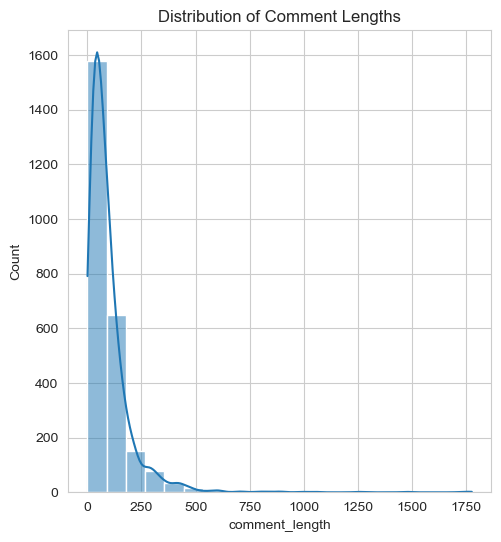

In [15]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot distribution of post lengths
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(df['comment_length'], kde=True, bins=20)
plt.title('Distribution of Comment Lengths')


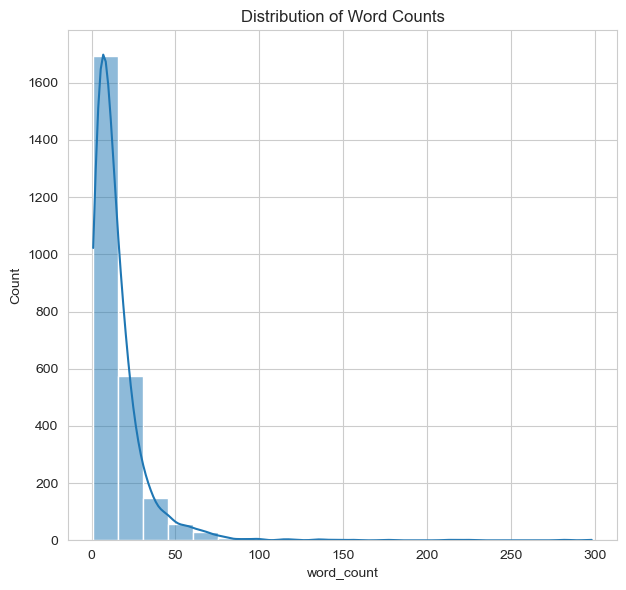

In [16]:
# Plot distribution of word counts
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.histplot(df['word_count'], kde=True, bins=20)
plt.title('Distribution of Word Counts')

plt.tight_layout()
plt.show()

## Task 5 - Let's analyze and visualize the most trending comments

###  the most trending comments Sort by Likes and Get Top 5

In [17]:
df.sort_values(by='like_count', ascending=False)[0:5]

,author,date,Comment,like_count,reply_count,comment_length,word_count
999,@jimaleahmed1444,2024-04-09T22:18:00Z,Taliye Shuute iyo Xeer ilaalintuba waaa dad Mu...,171,15,164,24
1192,@Cadar49,2024-04-09T18:10:22Z,Libaan waa in lasoo qabtaa asgaa ugu danbi wee...,165,27,132,24
1249,@sadiyoabdullahi5076,2024-04-09T17:44:23Z,Wiilka kalena weey ku dari lahaayen ee tiisa g...,162,10,79,14
1371,@Aniga-qn9iv,2024-04-09T16:08:41Z,Dad Xamar jooga way adag tahay ama waqti badan...,155,27,96,17
1284,@poom5180,2024-04-09T17:26:29Z,Shabakooyin kale ayaa jira ee sifiican halooga...,126,4,65,9


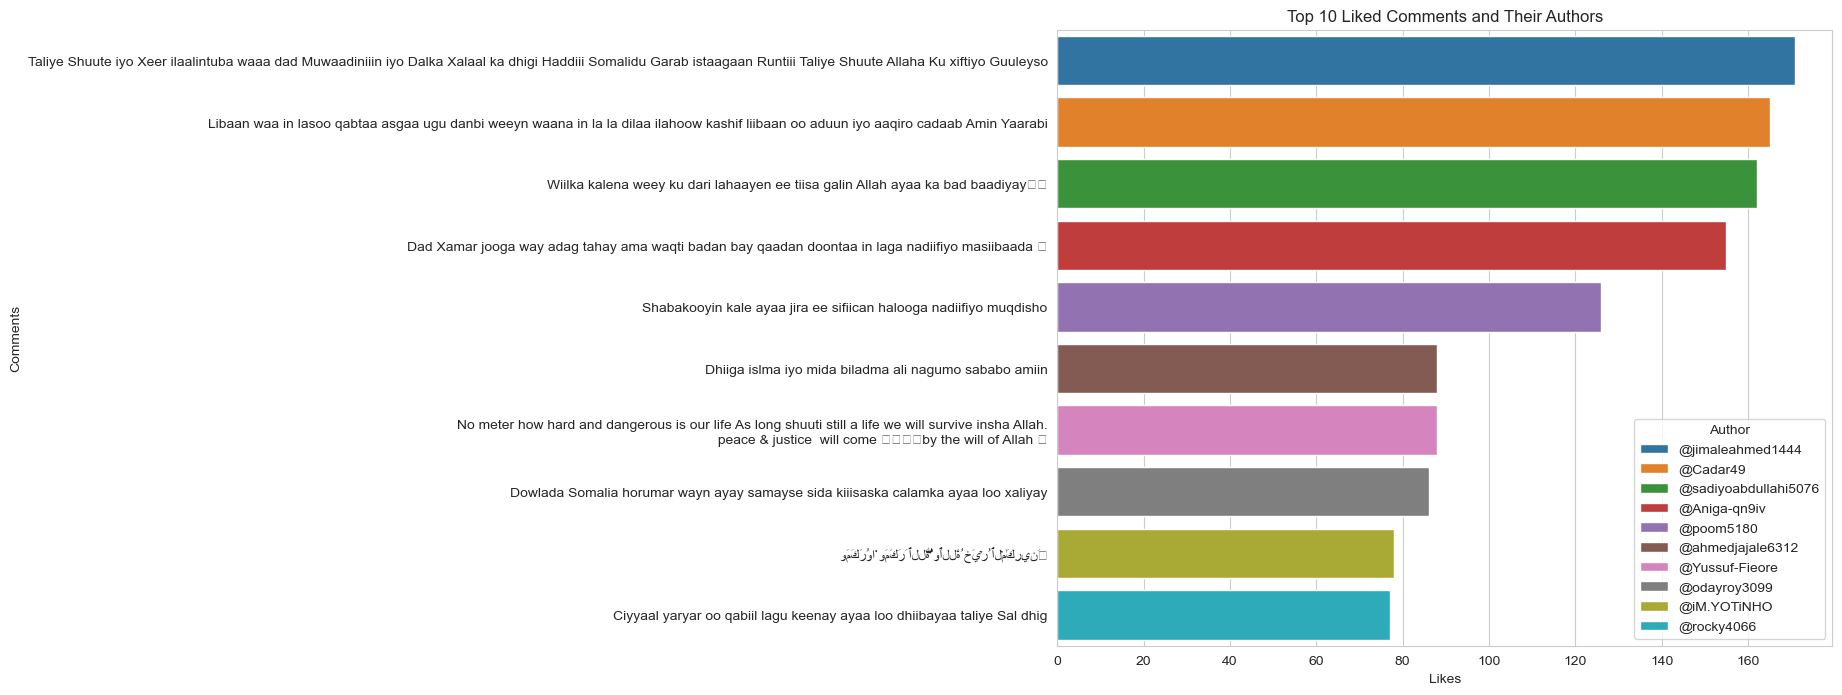

In [18]:
# Extracting the information for visualization
top_liked_comments_users = df[['author', 'Comment', 'like_count']].sort_values(by='like_count', ascending=False).head(10)

# Visualization
plt.figure(figsize=(10, 8))
sns.barplot(x='like_count', y='Comment', hue='author', dodge=False, data=top_liked_comments_users)
plt.title('Top 10 Liked Comments and Their Authors')
plt.xlabel('Likes')
plt.ylabel('Comments')
plt.legend(title='Author', loc='lower right')
plt.show()


###  the most trending comments Sort by replies and Get Top 5


In [19]:
df.sort_values(by='reply_count', ascending=False)[0:5]

,author,date,Comment,like_count,reply_count,comment_length,word_count
1192,@Cadar49,2024-04-09T18:10:22Z,Libaan waa in lasoo qabtaa asgaa ugu danbi wee...,165,27,132,24
1371,@Aniga-qn9iv,2024-04-09T16:08:41Z,Dad Xamar jooga way adag tahay ama waqti badan...,155,27,96,17
1144,@CoofavBulle-og5ld,2024-04-09T18:48:58Z,Qoslaaye\nLiibaan\nQoone \nseddexdaas nin hada...,16,18,112,17
999,@jimaleahmed1444,2024-04-09T22:18:00Z,Taliye Shuute iyo Xeer ilaalintuba waaa dad Mu...,171,15,164,24
1354,@heeganbuuxa-tx1te,2024-04-09T16:33:14Z,kuligood waa cabtooy mid midkale dhaama malaha...,75,11,274,38


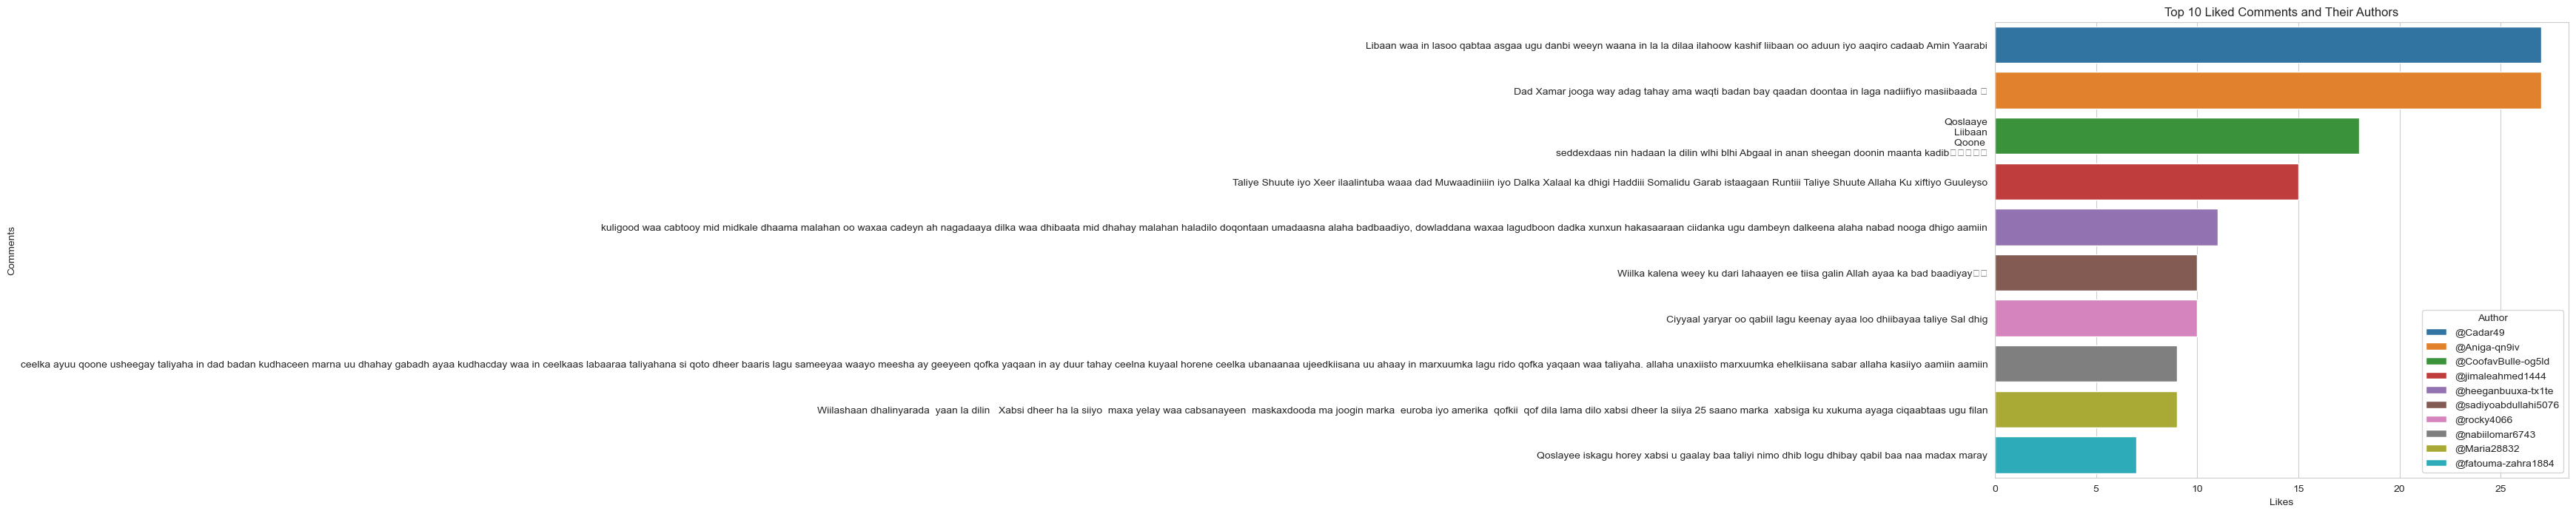

In [20]:
# Extracting the information for visualization
top_replied_comments_users = df[['author', 'Comment', 'reply_count']].sort_values(by='reply_count', ascending=False).head(10)

# Visualization
plt.figure(figsize=(10, 8))
sns.barplot(x='reply_count', y='Comment', hue='author', dodge=False, data=top_replied_comments_users)
plt.title('Top 10 Liked Comments and Their Authors')
plt.xlabel('Likes')
plt.ylabel('Comments')
plt.legend(title='Author', loc='lower right')
plt.show()


## Task 6 - Let's analyze and visualize the top 5 users by number of comments

### Unique Authors

In [21]:
unique_authors = df['author'].nunique()
unique_authors

1705

In [22]:
# Author analysis
top_contributors = df['author'].value_counts().head(5)
top_contributors

@niyaaladem               22
@user-eu7hu5vm4f          15
@fosiyaabiib9380          13
@AncientPharaoh           13
@saidaahmedmohamed4996    13
Name: author, dtype: int64

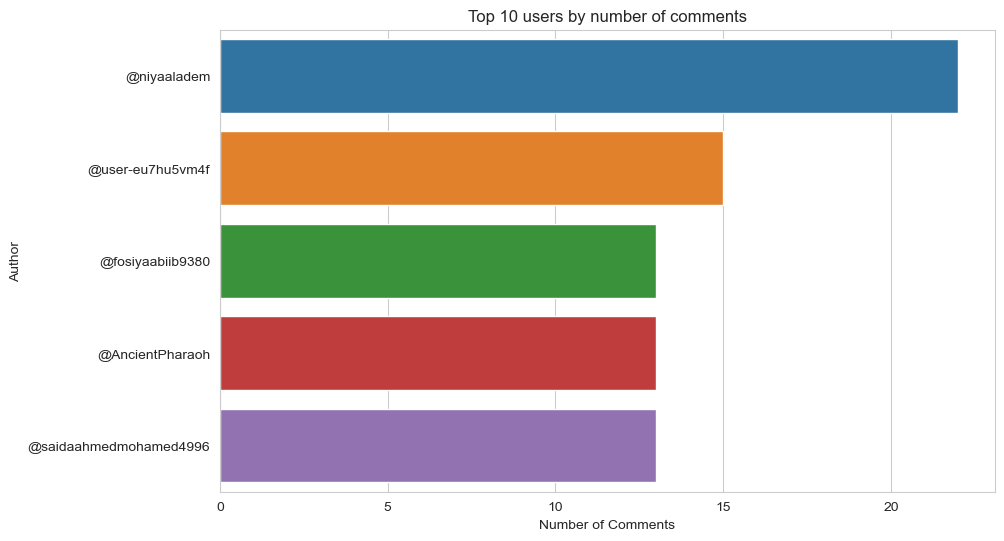

In [23]:
# Top Contributors
plt.figure(figsize=(10, 6))
sns.barplot(x=top_contributors.values, y=top_contributors.index)
plt.title('Top 10 users by number of comments')
plt.xlabel('Number of Comments')
plt.ylabel('Author')
plt.show()

## Task 7 - Let's visualize the prevalent words in the comments using WordCloud

In [24]:

# defining my own list completely
my_stopwords = {'ku', 'iyo', 'uu', 'ha', 'ma', 'laga', 'ugu', 'waa', 'in', 'ee', 'aa', 'u', 'scw', 'si',
                'inay', 'la', 'ah', 'ka', 'ayaa', 'iska', 'wax', 'oo', 'soo', 'ayuu', 'bal', 'uga', 'aan',
                'wa', 'i', 'buu', 'inu', 'loo', 'waxaa', 'waxaan', 'ah', 'lama', 'maxay', 'tahay',
               'a', 'lagu', 'maxaa', 'inuu', 'wada', 'wuxuu', 'hala', 'e', 'waxan', 'sida', 'aad', 'kale', 
                'ah', 'wuu', 'ama', 'sii', 'hadii', 'ay' 'aya', 'siduu', 'yaa', 'ayu', 'way', 'naga', 'war',
               'ba', 'aha', 'iga', 'baa', 'ay', 'muxuu', 'maa', 'is', 'ayay', 'so', 'laha', 'haka', 'aya', 'wuxu',
               'haa', 'he', 'ilaa', 'hada', 'mida', 'may', 'waxa', 'waan', 'hadaad', 'waxay', 'kuma', 'wixii', 
               'inaad', 'og', 'sow', 'inta', 'haku', 'lahaa', 'inay', 'alx', 'kugu', 'yahay', 'kaa', 'miyaa',
               'miya', 'ayey', 'maxa', 'haduu', 'leh', 'ayan', 'hadi', 'iney', 'isku', 'lkn', 'alle', 'na', 'kuu', 
                'muu', 'kama', 'aamiin', 'Asc', 'asaga', 'no', 'aniga', 'ahayn', 'lahayn', 'waye', 'isaga', 'qof',
               'kulaha', 'xamar', 'kan', 'ilahow', 'ey', 'asaga' 'wll', 'to' }



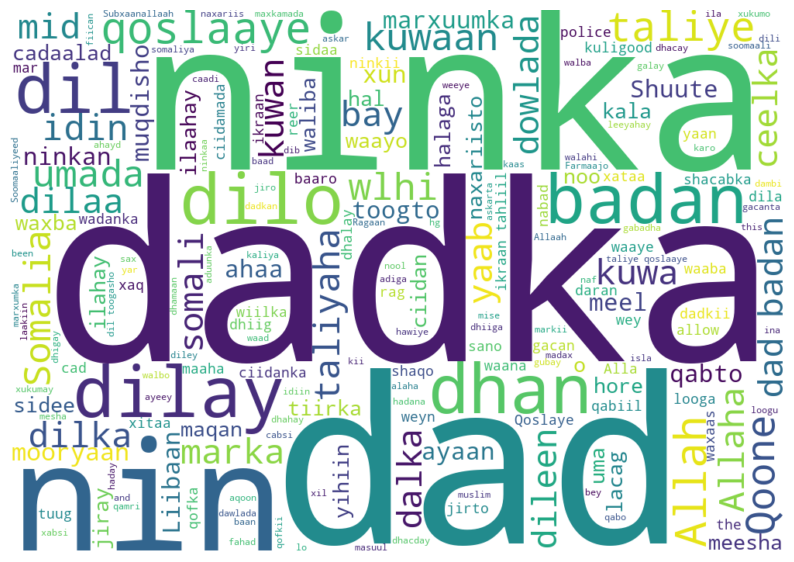

In [25]:
# Word cloud for comments
text = ' '.join(comment for comment in df.Comment)
stopwords = set(my_stopwords)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=1000, height=700,
            min_font_size = 10).generate(text) 

plt.figure(figsize=(10, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Task 8 - Let’s visualize in what STATE/COUNTRY were the top posts posted that mention your TOPIC

### unfortunately YouTube's Data API restricts access to directly access to the location data of its users due to their privacy and policy reasons.

## Task 9 - Let’s visualize on what day(s) of the month was your TOPIC talked about the most on the selected social media platform

### checking my data types to see if date column is datetime

In [26]:
df.dtypes

author            object
date              object
Comment           object
like_count         int64
reply_count        int64
comment_length     int64
word_count         int64
dtype: object

In [27]:
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])


In [28]:
# Verify the conversion by checking the data type again
print(df['date'].dtype)

datetime64[ns, UTC]


In [29]:
df.dtypes

author                         object
date              datetime64[ns, UTC]
Comment                        object
like_count                      int64
reply_count                     int64
comment_length                  int64
word_count                      int64
dtype: object

### Extracting Day of the Month

In [30]:
df['day_of_month'] = df['date'].dt.day

### Aggregate Data by Day of the Month
#### Now, count how many comments were made on each day of the month. This involves grouping the 'data by the day_of_month' and counting the number of comments.

In [31]:
comments_by_day = df.groupby('day_of_month')['Comment'].count()
comments_by_day

day_of_month
1       3
2       1
4      94
5     129
6     121
7      65
8      27
9     354
10    303
11    354
12    245
13    222
14    159
15    125
16     59
17     18
18     26
19      6
21    152
22     21
23      7
24     17
25     13
26      3
27      2
Name: Comment, dtype: int64

### Visualize the Data
#### Finally, use a bar chart to visualize the number of comments per day of the month.

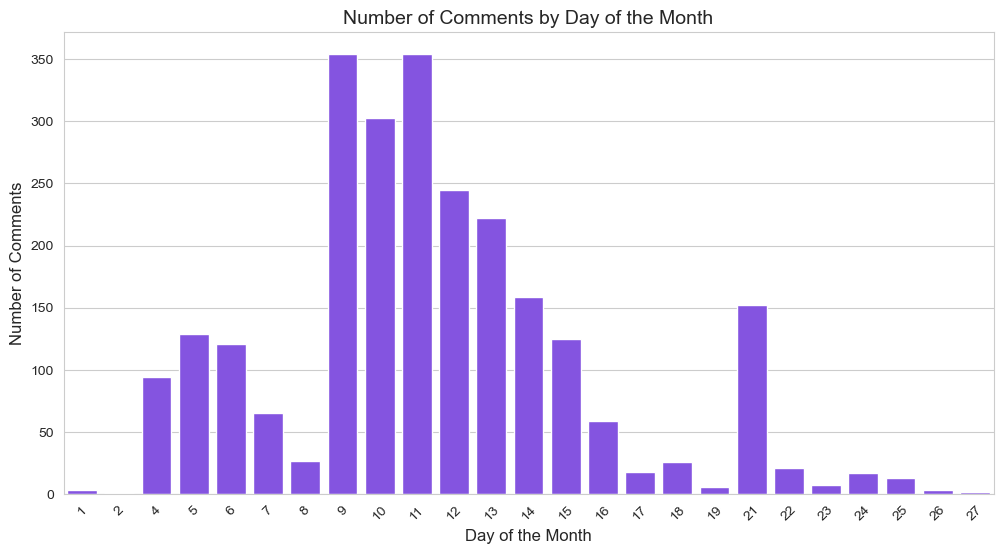

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(x=comments_by_day.index, y=comments_by_day.values, color='#7D3CF8')  # Electric Purple
plt.title('Number of Comments by Day of the Month', fontsize=14)
plt.xlabel('Day of the Month', fontsize=12)
plt.ylabel('Number of Comments', fontsize=12)
plt.xticks(rotation=45) # Helps with readability if there are many days
plt.show()



## Task 10: Let’s collect 3,000 statements across Somali public pages on Social Media Outlet and annotate them into three sentiment labels:- Positive-wanaag, Negative-xumaan or Neutral-dhexdhexaad

In [33]:
Sentiments = pd.read_csv('Sentiment_data.csv')
Sentiments.head()

,Statements,Label
0,naxariis,1
1,jaceyl,1
2,amaan,1
3,jiidasho,1
4,raali galin,1


In [34]:
Sentiments.isna().sum()

Statements    66
Label          0
dtype: int64

In [35]:
Sentiments = Sentiments.dropna()

In [36]:
Sentiments.isna().sum()

Statements    0
Label         0
dtype: int64

In [37]:
Sentiments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3313 entries, 0 to 3378
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Statements  3313 non-null   object
 1   Label       3313 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 77.6+ KB


In [38]:
def remove_punctuation(text):
    return "".join([t for t in text if t not in string.punctuation])


In [39]:
def words_with_more_than_three_chars(text):
    return " ".join([t for t in text.split() if len(t)>3])


In [40]:
import string

def remove_punctuation(x):
    # Check if x is a string instance
    if isinstance(x, str):
        # If x is a string, remove punctuation
        return x.translate(str.maketrans('', '', string.punctuation))
    else:
        # If x is not a string (e.g., NaN or a number), return it unchanged
        return x

In [41]:
# Assuming Sentiments is your DataFrame and 'Statement' is a column in it
Sentiments['Statements'] = Sentiments['Statements'].apply(lambda x: remove_punctuation(x))

# Display the first 10 rows of the DataFrame
Sentiments.head(10)


,Statements,Label
0,naxariis,1
1,jaceyl,1
2,amaan,1
3,jiidasho,1
4,raali galin,1
5,hambalyo,1
6,faraxad,1
7,qurux,1
8,quruxsan,1
9,jecel yahay,1


In [42]:
# Convert non-string values to strings
Sentiments['Statements'] = Sentiments['Statements'].astype(str)

In [43]:
Sentiments['Statements']=Sentiments['Statements'].apply(lambda x:remove_punctuation(x))
Sentiments['Statements']=Sentiments['Statements'].apply(lambda x:words_with_more_than_three_chars(x))
Sentiments['Statements']=Sentiments['Statements'].apply(lambda x: ' '.join([word for word in x.split()]))

In [44]:
Sentiments['Sentiments'] = Sentiments['Label'].map({1:'Possitive-Wanaag',2:'Neutral-Dhexdhexaad',3:'Negative-Xumaan'})
Sentiments.tail()

,Statements,Label,Sentiments
3374,dhiladii dhashay,3,Negative-Xumaan
3375,intaas lagugu badnasaa loodaawado dagaal kiina...,3,Negative-Xumaan
3376,Dhocil masersan xnuun,3,Negative-Xumaan
3377,Fartuuun tuugo kasoo sameey part2 wlhi qoslaay...,3,Negative-Xumaan
3378,Fartuuntuu sheegaayo maba fahmine dhib badnaa ...,3,Negative-Xumaan


<Axes: title={'center': 'Target class'}, xlabel='Sentiments'>

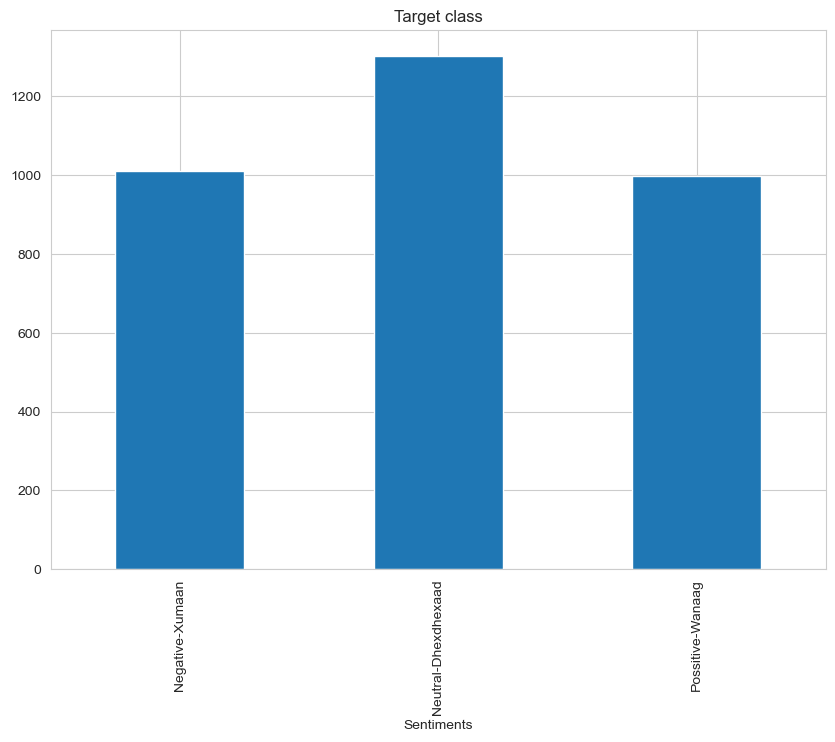

In [45]:
Sentiments.groupby('Sentiments')['Sentiments'].count().plot(kind='bar',title='Target class',figsize=(10,7))


In [46]:
# Convert stop_words_to_lower to a set for faster membership testing
stop_words_set = set(my_stopwords)

# Define a function to clean and process each comment
def process_comment(comment):
    review = re.sub('[^a-zA-Z]', ' ', str(comment))
    review = review.lower().split()
    review = [word for word in review if word not in stop_words_set]
    return ' '.join(review)

In [47]:
# Apply the function to each comment in the DataFrame
Sentiments['ProcessedStatement'] = Sentiments['Statements'].apply(process_comment)

Sentiments.head()

,Statements,Label,Sentiments,ProcessedStatement
0,naxariis,1,Possitive-Wanaag,naxariis
1,jaceyl,1,Possitive-Wanaag,jaceyl
2,amaan,1,Possitive-Wanaag,amaan
3,jiidasho,1,Possitive-Wanaag,jiidasho
4,raali galin,1,Possitive-Wanaag,raali galin


In [48]:
# Task 11 - Let’s train a sentiment analysis model using machine learning

X = Sentiments['ProcessedStatement']  # The column containing text data
y =  Sentiments['Sentiments']  # The column containing sentiment labels

In [49]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:

# Define a machine learning pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase=True)),
    ('classifier', LogisticRegression(random_state=42)),
])

In [51]:
# Train the model with the corrected data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', LogisticRegression(random_state=42))])

In [52]:
# Accuracy Testing on the Model

from sklearn.metrics import accuracy_score
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 82.20%


In [54]:
# Convert stop_words_to_lower to a set for faster membership testing
stop_words_set = set(my_stopwords)

# Define a function to clean and process each comment
def process_comment(comment):
    review = re.sub('[^a-zA-Z]', ' ', str(comment))
    review = review.lower().split()
    review = [word for word in review if word not in stop_words_set]
    return ' '.join(review)

# Apply the function to each comment in the DataFrame
df['ProcessedComment'] = df['Comment'].apply(process_comment)


In [55]:
# Task 12 - Let’s now apply the trained model on the selected topic textual contents in order to predict their sentiments
# Now, you can predict with confidence that the pipeline is fitted
predicted_sentiments = pipeline.predict(df['ProcessedComment'])
df['Predicted Sentiment'] = predicted_sentiments

# Displaying the original comments with their predicted sentiments
print(df[['ProcessedComment', 'Predicted Sentiment']].head())

                                    ProcessedComment Predicted Sentiment
0  cadaab rabi bilaash uma san mujrimiin rabiyaw ...     Negative-Xumaan
1                   beenaale gacan dhiigle tuug dilo     Negative-Xumaan
2  all shaba le haye polis dada cun qamriga qaram...     Negative-Xumaan
3  hadu yaqaano ii abtiriyo kulahaa kk hoyadaaba ...     Negative-Xumaan
4  sarkaal bistoolda dibtay ina asagana talabo la...    Possitive-Wanaag


In [56]:
## Applying  the trained model to predict sentiments of the selected topic textual contents
# Applying the trained model to predict sentiments of the selected topic textual contents
predicted_sentiments = pipeline.predict(df['ProcessedComment'])

# Add the predictions to the original dataframe for review
df['Predicted Sentiment'] = predicted_sentiments

# Displaying the original comments with their predicted sentiments
print(df[['ProcessedComment', 'ProcessedComment']].head())


                                    ProcessedComment  \
0  cadaab rabi bilaash uma san mujrimiin rabiyaw ...   
1                   beenaale gacan dhiigle tuug dilo   
2  all shaba le haye polis dada cun qamriga qaram...   
3  hadu yaqaano ii abtiriyo kulahaa kk hoyadaaba ...   
4  sarkaal bistoolda dibtay ina asagana talabo la...   

                                    ProcessedComment  
0  cadaab rabi bilaash uma san mujrimiin rabiyaw ...  
1                   beenaale gacan dhiigle tuug dilo  
2  all shaba le haye polis dada cun qamriga qaram...  
3  hadu yaqaano ii abtiriyo kulahaa kk hoyadaaba ...  
4  sarkaal bistoolda dibtay ina asagana talabo la...  


In [57]:
df.head()

,author,date,Comment,like_count,reply_count,comment_length,word_count,day_of_month,ProcessedComment,Predicted Sentiment
0,@maryamadirie8722,2024-04-19 09:43:45+00:00,Cadaab ka rabi bilaash uma san mujrimiin Rabiy...,0,0,61,10,19,cadaab rabi bilaash uma san mujrimiin rabiyaw ...,Negative-Xumaan
1,@hagiohaji7937,2024-04-19 03:35:24+00:00,"Beenaale gacan ku dhiigle tuug, hala dilo.",0,0,42,7,19,beenaale gacan dhiigle tuug dilo,Negative-Xumaan
2,@fadumawarsamemumin4232,2024-04-18 12:17:27+00:00,All Shaba a le lagu Haye Polis dada cun ah Qam...,0,0,96,18,18,all shaba le haye polis dada cun qamriga qaram...,Negative-Xumaan
3,@user-we3ty2ct8f,2024-04-17 22:02:09+00:00,Hadu I yaqaano ha ii abtiriyo kulahaa kk ma ho...,0,0,125,22,17,hadu yaqaano ii abtiriyo kulahaa kk hoyadaaba ...,Negative-Xumaan
4,@abdiali4991,2024-04-17 08:07:17+00:00,Sarkaal kan bistoolda loo dibtay waa ina asaga...,0,0,117,19,17,sarkaal bistoolda dibtay ina asagana talabo la...,Possitive-Wanaag


In [58]:
# Task 13 - Let’s visualize the sentiment percentages (positive, negative, neutral) for the selected topic

## before the visualization let's calculating sentiment distribution in the predicted sentiments

# Calculating sentiment distribution in the predicted sentiments
predicted_sentiments_distribution = df['Predicted Sentiment'].value_counts(normalize=True) * 100
predicted_sentiments_distribution


Negative-Xumaan        52.335709
Possitive-Wanaag       45.645289
Neutral-Dhexdhexaad     2.019002
Name: Predicted Sentiment, dtype: float64

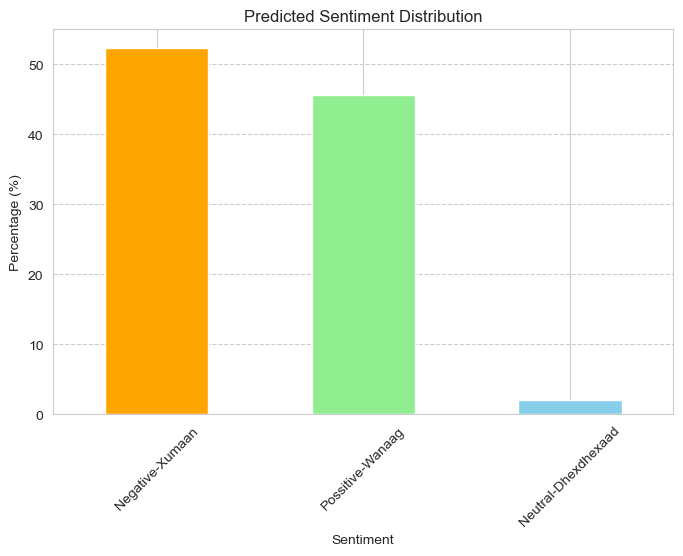

In [59]:
## Visualizing the Predicted sentiment

plt.figure(figsize=(8, 5))
predicted_sentiments_distribution.plot(kind='bar', color=['orange', 'lightgreen', 'skyblue'])
plt.title('Predicted Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


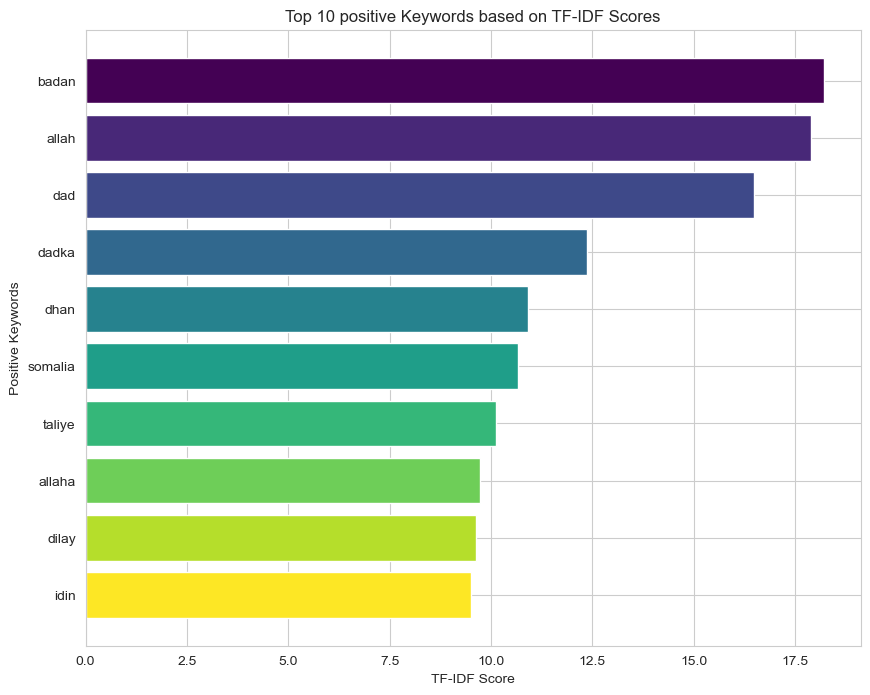

In [60]:
# Task 14 - Let’s visualize the top positive keywords associated with the selected topic

from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Filter the dataset for comments predicted as positive
positive_comments = df[df['Predicted Sentiment'] == 'Possitive-Wanaag']['ProcessedComment']

# Apply TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')  # Adjust or remove stop_words as necessary
tfidf_matrix = tfidf_vectorizer.fit_transform(positive_comments)

# Get feature names and tfidf scores
feature_names = tfidf_vectorizer.get_feature_names_out()
scores = np.asarray(tfidf_matrix.sum(axis=0)).ravel()
tfidf_scores = dict(zip(feature_names, scores))

# Sort the scores in descending order
sorted_tfidf_scores = sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True)

# Convert to DataFrame for easy handling and visualization
df_tfidf_scores = pd.DataFrame(sorted_tfidf_scores, columns=['Term', 'Score']).head(10)  

# Visualization using a colormap
plt.figure(figsize=(10, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(df_tfidf_scores)))
plt.barh(df_tfidf_scores['Term'], df_tfidf_scores['Score'], color=colors)
plt.xlabel('TF-IDF Score')
plt.ylabel('Positive Keywords')
plt.title('Top 10 positive Keywords based on TF-IDF Scores')
plt.gca().invert_yaxis()
plt.show()



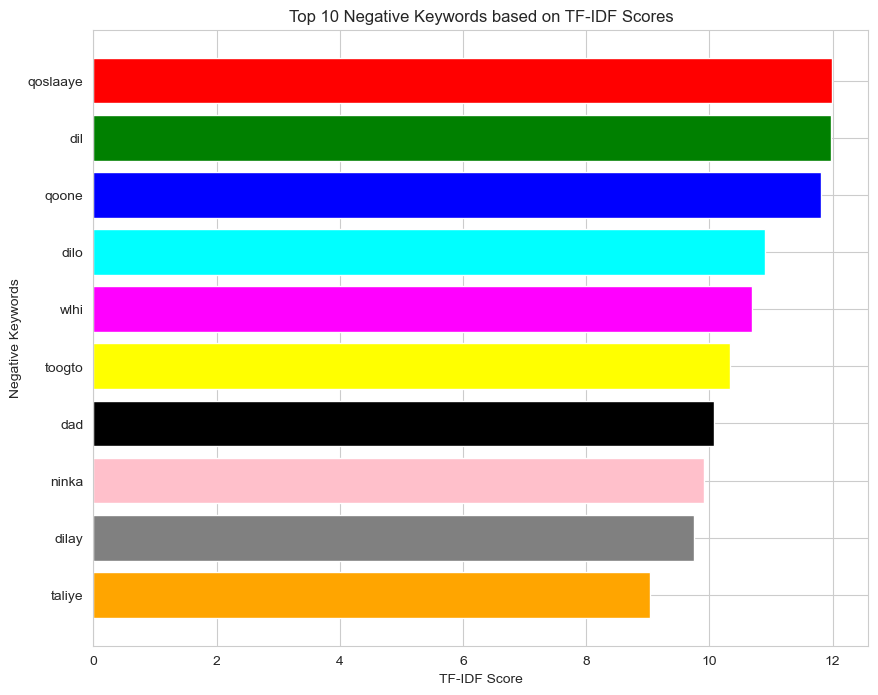

In [61]:
# Task 15 - Let’s visualize the top negative keywords associated with the selected topic

from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Filter the dataset for comments predicted as positive
positive_comments = df[df['Predicted Sentiment'] == 'Negative-Xumaan']['ProcessedComment']

# Apply TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')  # Adjust or remove stop_words as necessary
tfidf_matrix = tfidf_vectorizer.fit_transform(positive_comments)

# Get feature names and tfidf scores
feature_names = tfidf_vectorizer.get_feature_names_out()
scores = np.asarray(tfidf_matrix.sum(axis=0)).ravel()
tfidf_scores = dict(zip(feature_names, scores))

# Sort the scores in descending order
sorted_tfidf_scores = sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True)

# Convert to DataFrame for easy handling and visualization
df_tfidf_scores = pd.DataFrame(sorted_tfidf_scores, columns=['Term', 'Score']).head(10)  

# Visualization with custom colors
plt.figure(figsize=(10, 8))
custom_colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'gray', 'orange']
plt.barh(df_tfidf_scores['Term'], df_tfidf_scores['Score'], color=custom_colors)
plt.xlabel('TF-IDF Score')
plt.ylabel('Negative Keywords')
plt.title('Top 10 Negative Keywords based on TF-IDF Scores')
plt.gca().invert_yaxis()
plt.show()
